<a href="https://colab.research.google.com/github/adrija2706/EDA/blob/main/21BDS0061_EDA_THEORY_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EDA THEORY DA***


# **MODULE 2**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load the dataset**

In [ ]:
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv"
data = pd.read_csv(data_url)

## **Display first 10 rows**

In [ ]:
print("First 10 rows of the dataset :")
print(data.head(10))

First 10 rows of the dataset :
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   
5           6  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92   
6           7  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01   
7           8  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82   
8           9  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69   
9          10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  7

## **Check for NA values**

In [ ]:
print ("\nChecking for missing values: ")
print(data.isna().sum())


Checking for missing values: 
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


## **Summary of missing values**

In [ ]:
total_na = data.isna().sum().sum()
print(f"\nTotal number of missing values: {total_na}")


Total number of missing values: 31


## **Count complete values in specific columns**

In [ ]:
columns_of_interest = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']
complete_values = data[columns_of_interest].notna().sum()
print("\nTotal complete values per column:")
print(complete_values)


Total complete values per column:
ALB     614
ALP     597
ALT     614
CHOL    605
PROT    614
dtype: int64


## **Count missing values proportionally per column**

In [ ]:
missing_proportion = data.isna().sum() / len(data) * 100
print("\nMissing values proportion per column:")
print(missing_proportion)



Missing values proportion per column:
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
ALB           0.162602
ALP           2.926829
ALT           0.162602
AST           0.000000
BIL           0.000000
CHE           0.000000
CHOL          1.626016
CREA          0.000000
GGT           0.000000
PROT          0.162602
dtype: float64


## **Missing values visualization**

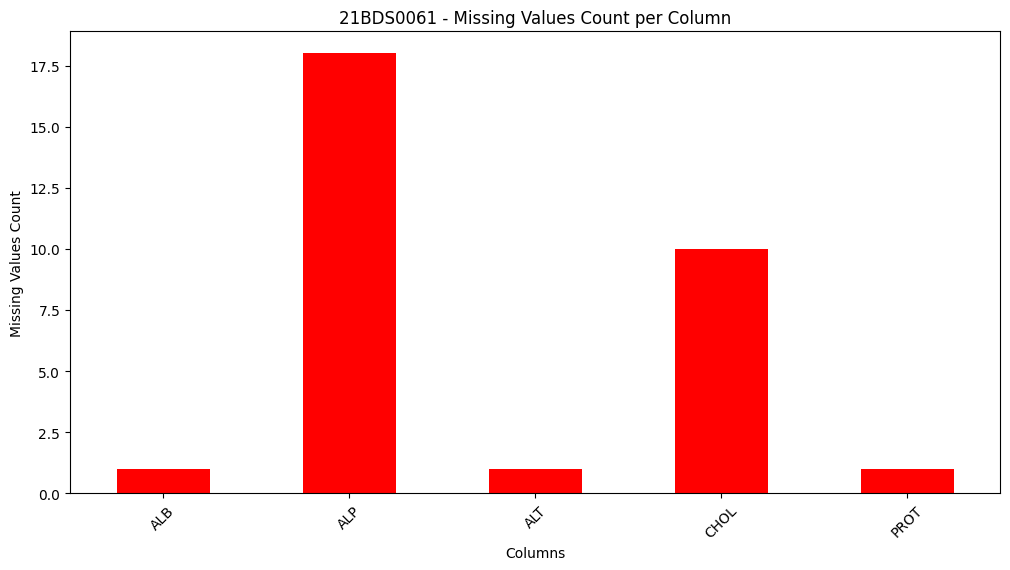

In [ ]:
plt.figure(figsize=(12, 6))
missing_counts = data.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.plot(kind='bar', color = 'red')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('21BDS0061 - Missing Values Count per Column')
plt.xticks(rotation=45)
plt.show()

## **Perform row-wise deletion (removing rows with missing values)**

In [ ]:
data_cleaned = data.dropna()
print("\nData after row-wise deletion:")
print(data_cleaned.head(10))


Data after row-wise deletion:
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   
5           6  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92   
6           7  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01   
7           8  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82   
8           9  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69   
9          10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  7

## **Convert categorical columns to numeric**

In [ ]:
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col], _ = pd.factorize(data_cleaned[col])

## **Statistical Analysis**

In [ ]:
print("\nStatistical summary:")
print(data_cleaned.describe().T)
stats = data_cleaned.describe().T
stats["median"] = data_cleaned.median()
stats["std"] = data_cleaned.std()
stats["min"] = data_cleaned.min()
stats["max"] = data_cleaned.max()
stats["quantiles"] = data_cleaned.quantile([0.25, 0.5, 0.75]).T.values.tolist()

print("\nExtended Statistical Summary:")
print(stats)




Statistical summary:
            count        mean         std    min     25%     50%     75%  \
Unnamed: 0  589.0  298.648557  174.142507   1.00  149.00  296.00  448.00   
Category    589.0    0.303905    0.944552   0.00    0.00    0.00    0.00   
Age         589.0   47.417657    9.931334  23.00   39.00   47.00   54.00   
Sex         589.0    0.383701    0.486700   0.00    0.00    0.00    1.00   
ALB         589.0   41.624278    5.761794  14.90   38.80   41.90   45.10   
ALP         589.0   68.123090   25.921072  11.30   52.50   66.20   79.90   
ALT         589.0   26.575382   20.863120   0.90   16.40   22.70   31.90   
AST         589.0   33.772835   32.866871  10.60   21.50   25.70   31.70   
BIL         589.0   11.018166   17.406572   0.80    5.20    7.10   11.00   
CHE         589.0    8.203633    2.191073   1.42    6.93    8.26    9.57   
CHOL        589.0    5.391341    1.128954   1.43    4.62    5.31    6.08   
CREA        589.0   81.669100   50.696991   8.00   68.00   77.00  

# **Module 3**

## **Load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/HepatitisCdata.csv"
data = pd.read_csv(data_url)

## **Display the number of rows and columnns**

In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (615, 14)


## **Display the header or attribute names**

In [ ]:
print("Column Names:", data.columns.tolist())

Column Names: ['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


## **View the First and Last 10 rows of the dataset**

In [ ]:
print("First 10 rows of the dataset:")
print(data.head(10))

print("\nLast 10 rows of the dataset:")
print(data.tail(10))

First 10 rows of the dataset:
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   
5           6  0=Blood Donor   32   m  41.6  43.3  18.5  19.7  12.3   9.92   
6           7  0=Blood Donor   32   m  46.3  41.3  17.5  17.8   8.5   7.01   
7           8  0=Blood Donor   32   m  42.2  41.9  35.8  31.1  16.1   5.82   
8           9  0=Blood Donor   32   m  50.9  65.5  23.2  21.2   6.9   8.69   
9          10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79

## **Delete the column 'BIL'**

In [ ]:
data.drop(columns = ['BIL'], inplace = True)
print("Column 'BIL' deleted.")

Column 'BIL' deleted.


## **Show the summary statistics**

In [ ]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  615.000000  605.000000   615.000000  615.000000  614.000000  
mean     8.196634    5.368099    81.287805   39.533171   72.044137  
std      2.205657    1.132728    49.756166 

## **Find the number of non-numeric values in specific columns**

In [ ]:
columns_to_check = ['ALB', 'ALT', 'AST', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
non_numeric_counts = data[columns_to_check].apply(lambda x: x.apply(lambda y: not isinstance(y, (int, float)))).sum()
print("\nNon-numeric values in specified columns:")
print(non_numeric_counts)


Non-numeric values in specified columns:
ALB     0
ALT     0
AST     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64


## **Compute measures of central tendency for AST**

In [ ]:
print("Central Tendency of AST:")
print("Mean :",data['AST'].mean())
print("Median : ",data['AST'].median())
print("Mode : ",data['AST'].mode()[0])

Central Tendency of AST:
Mean : 34.78634146341463
Median :  25.9
Mode :  22.0


## **Compute measures of dispersion for AST**

In [ ]:
print("Dispersion of AST:")
print("Variance : ",data['AST'].var())
print("Standard Deviation : ",data['AST'].std())

Dispersion of AST:
Variance :  1094.9937870819103
Standard Deviation :  33.090690338551575


## **Compute quartile ranges and IQR for AST**

In [ ]:
q1 = data['AST'].quantile(0.25)
q2 = data['AST'].quantile(0.50)
q3 = data['AST'].quantile(0.75)
q4 = data['AST'].quantile(1.00)
iqr = q3 - q1
print("\nQuartiles and IQR for AST:")
print("Q1:", q1,"\n", "Q2:", q2,"\n", "Q3:", q3,"\n", "Q4:", q4, "\nIQR:", iqr)


Quartiles and IQR for AST:
Q1: 21.6 
 Q2: 25.9 
 Q3: 32.9 
 Q4: 324.0 
IQR: 11.299999999999997


## **Calculate correlation between CHOL and Age**

In [ ]:
print("Correlation between CHOL and Age:")
print(data['CHOL'].corr(data['Age']))

Correlation between CHOL and Age:
0.12564101435651298


## **Univariate Analysis**

### **Distribution plots for AST**

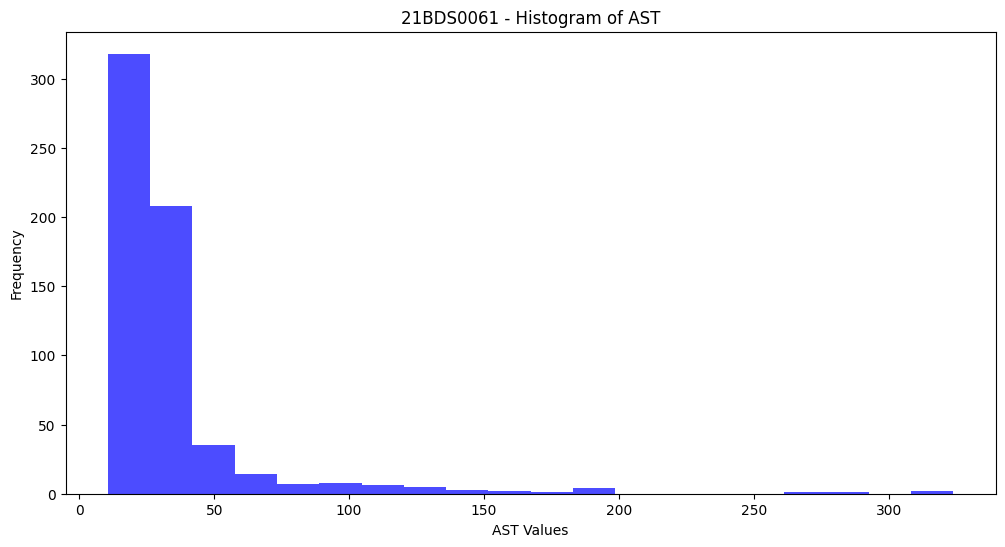

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['AST'], bins=20, color='blue', alpha=0.7)
plt.title("21BDS0061 - Histogram of AST")
plt.xlabel("AST Values")
plt.ylabel("Frequency")
plt.show()

### **Density plots for AST**

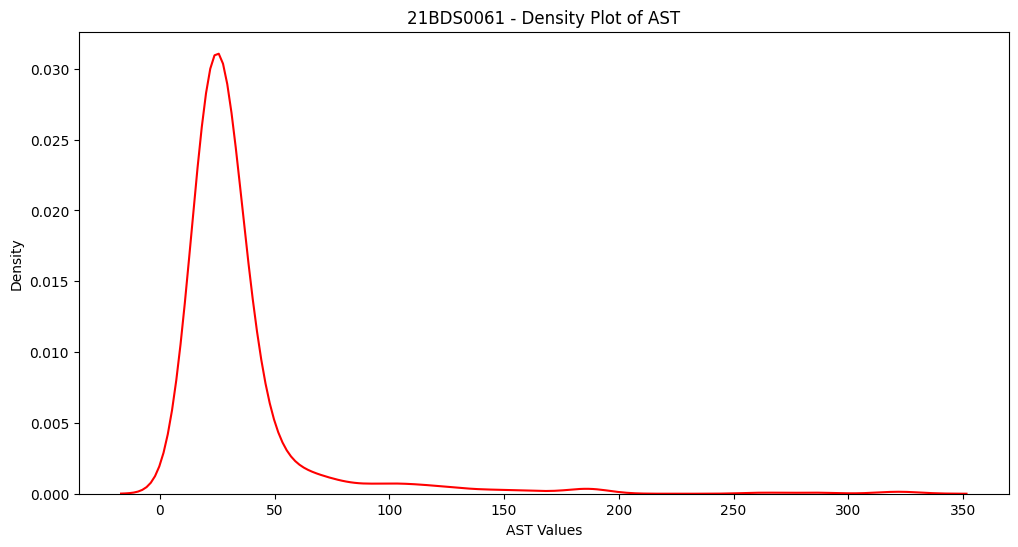

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data['AST'], color='red')
plt.title("21BDS0061 - Density Plot of AST")
plt.xlabel("AST Values")
plt.ylabel("Density")
plt.show()

### **Histogram and Density plots for AST**

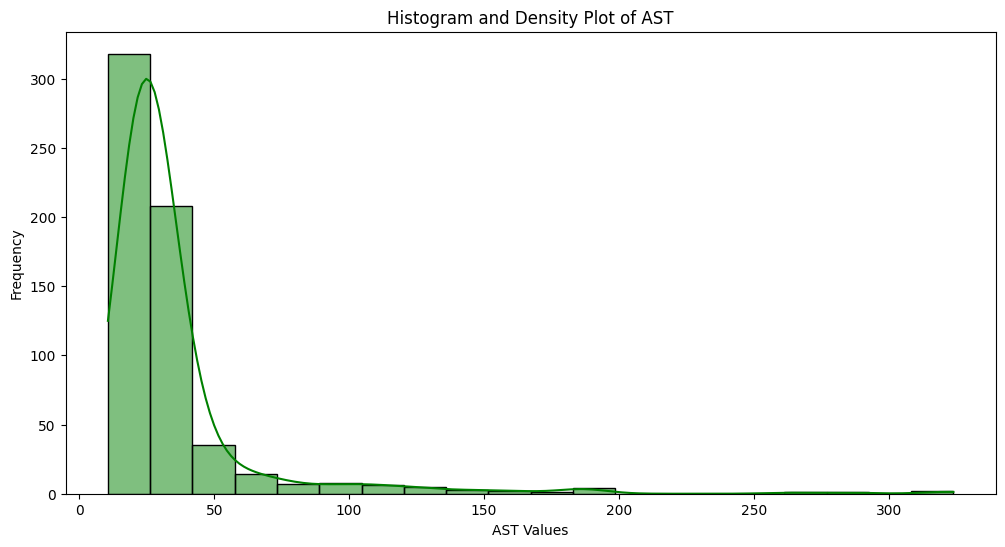

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['AST'], kde=True, bins=20, color='green')
plt.title("Histogram and Density Plot of AST")
plt.xlabel("AST Values")
plt.ylabel("Frequency")
plt.show()

### **Box plot for AST**

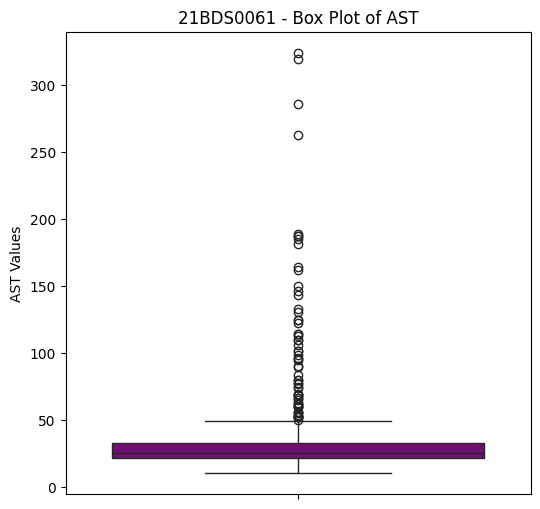

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=data['AST'], color='purple')
plt.title("21BDS0061 - Box Plot of AST")
plt.ylabel("AST Values")
plt.show()


### **Bar plot for 'Category' (vertical and horizontal)**

> Add blockquote



<ipython-input-17-6c2451e2a1b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='viridis')


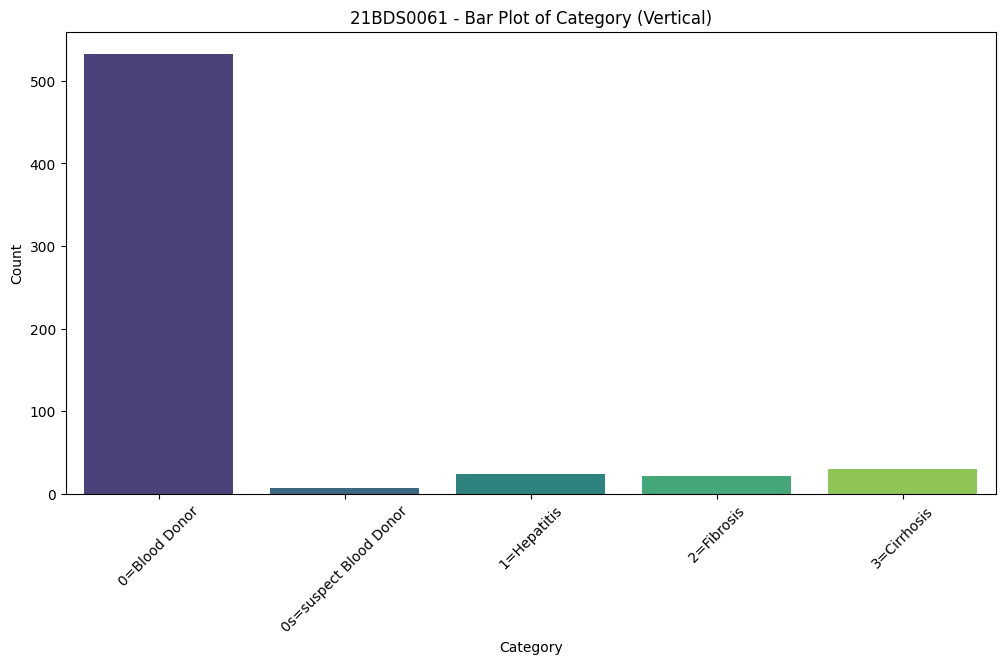

<ipython-input-17-6c2451e2a1b8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=data, palette='viridis')


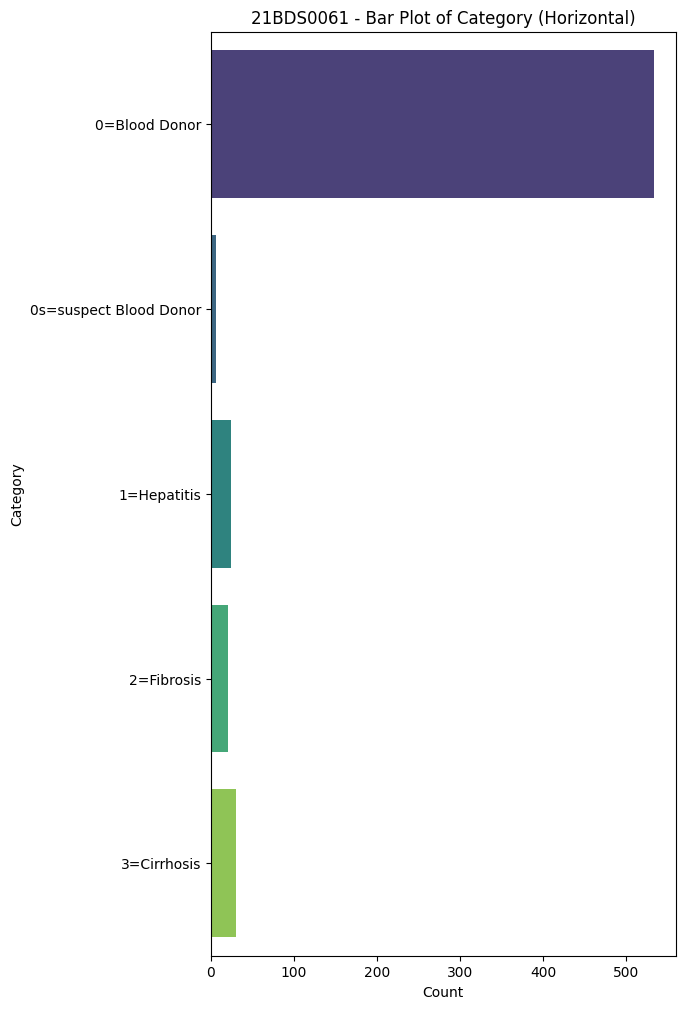

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=data, palette='viridis')
plt.title("21BDS0061 - Bar Plot of Category (Vertical)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 12))
sns.countplot(y='Category', data=data, palette='viridis')
plt.title("21BDS0061 - Bar Plot of Category (Horizontal)")
plt.ylabel("Category")
plt.xlabel("Count")
plt.show()

### **Pie plot for 'Category'**

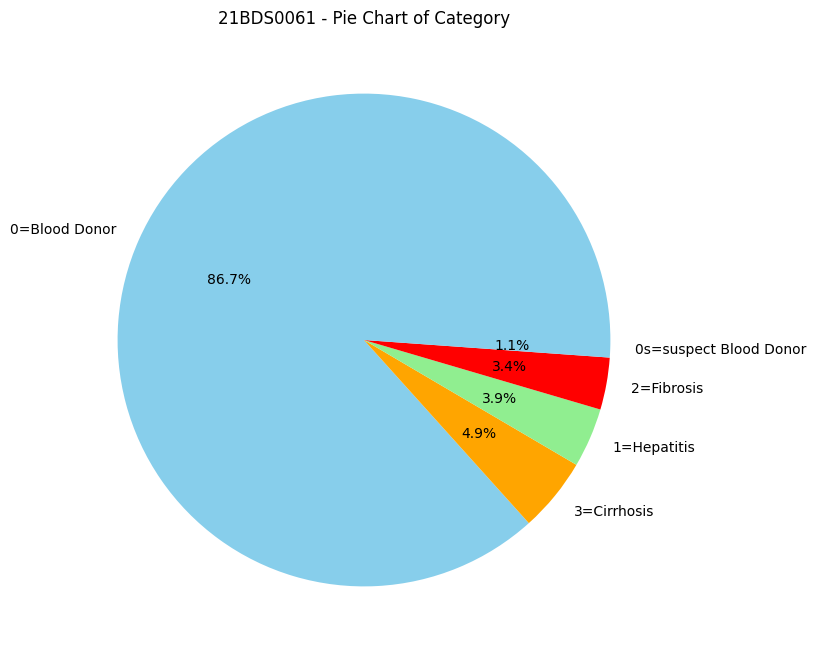

In [ ]:
data['Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'orange', 'lightgreen', 'red'])
plt.title("21BDS0061 - Pie Chart of Category")
plt.ylabel("")
plt.show()

### **Dot plot for AST**

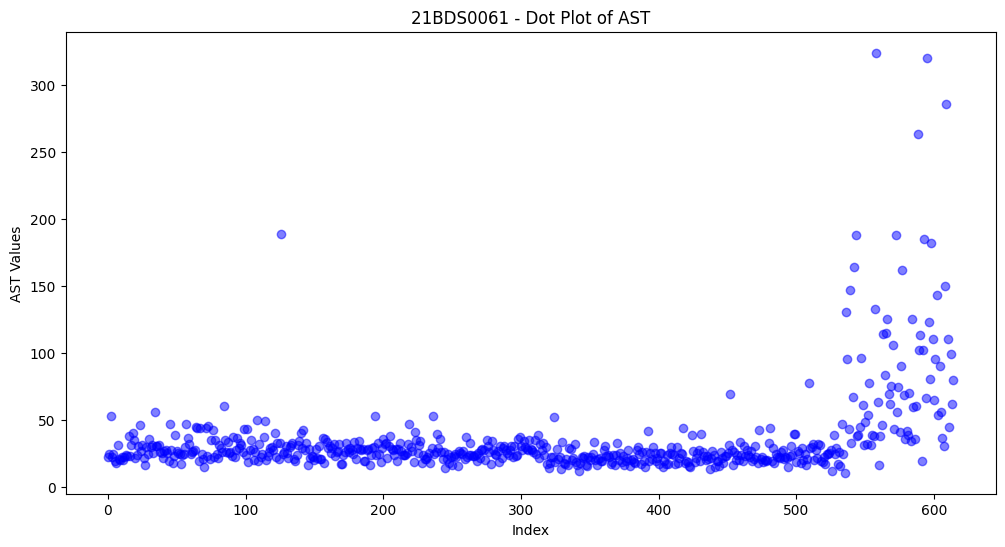

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['AST'], 'bo', alpha=0.5)
plt.title("21BDS0061 - Dot Plot of AST")
plt.xlabel("Index")
plt.ylabel("AST Values")
plt.show()


## **Bivariate Analysis**

### **Create a contingency table for "Category" and "Sex"**

In [ ]:
cont_table = pd.crosstab(data['Category'], data['Sex'])
print("Contingency Table:")
print(cont_table)

Contingency Table:
Sex                       f    m
Category                        
0=Blood Donor           215  318
0s=suspect Blood Donor    1    6
1=Hepatitis               4   20
2=Fibrosis                8   13
3=Cirrhosis              10   20


### **Categorical vs. Categorical**

#### **Stacked Bar Chart**

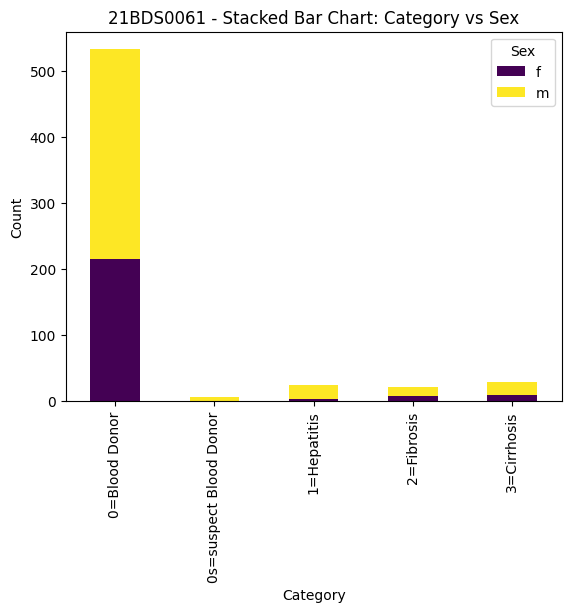

In [ ]:
cont_table.plot(kind="bar", stacked=True, colormap="viridis")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("21BDS0061 - Stacked Bar Chart: Category vs Sex")
plt.legend(title="Sex")
plt.show()

#### **Grouped Bar Plot (Side-by-side)**

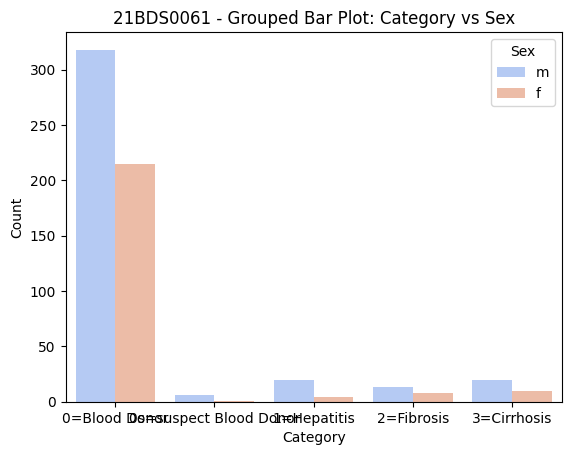

In [ ]:
sns.countplot(data=data, x="Category", hue="Sex", palette="coolwarm", dodge=True)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("21BDS0061 - Grouped Bar Plot: Category vs Sex")
plt.show()

### **Quantitative vs. Quantitative**

#### **Scatter Plot**

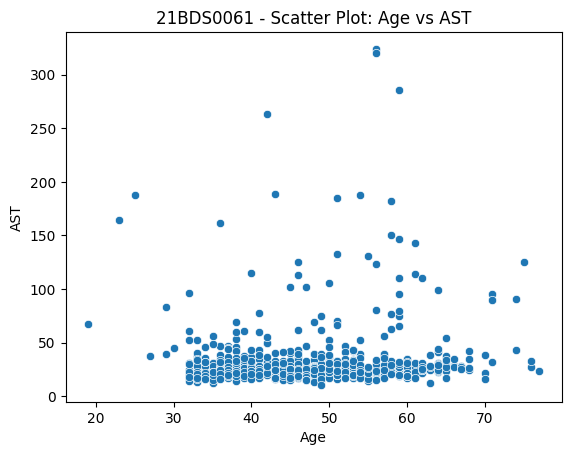

In [ ]:
sns.scatterplot(data = data, x = "Age", y = "AST")
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Scatter Plot: Age vs AST")
plt.show()

#### **Line Plot**

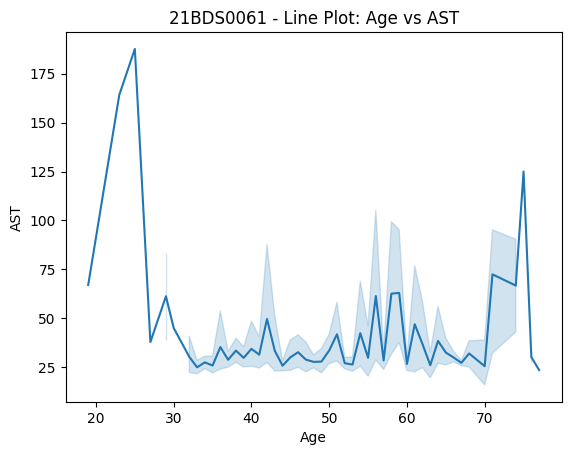

In [ ]:
sns.lineplot(data=data, x="Age", y="AST")
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Line Plot: Age vs AST")
plt.show()


#### **Heatmap (Correlation Matrix)**

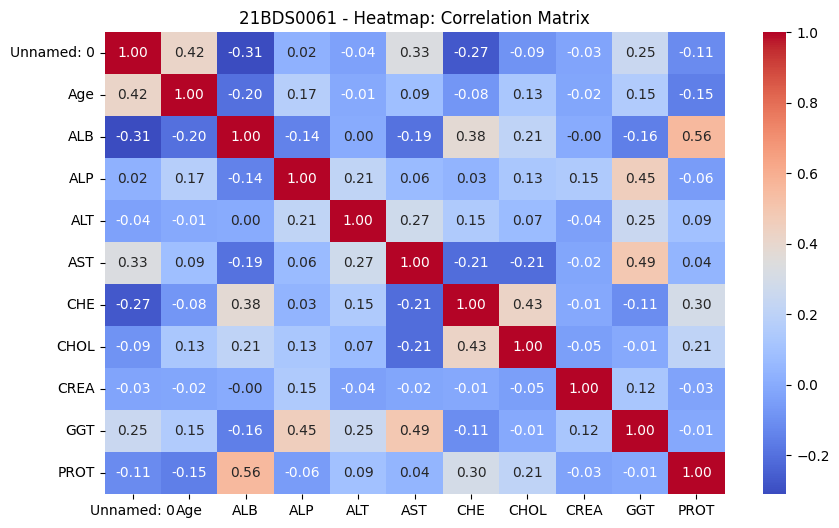

In [ ]:
corr_matrix = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("21BDS0061 - Heatmap: Correlation Matrix")
plt.show()

### **Categorical vs. Quantitative**

#### **Bar Chart**

<ipython-input-41-d89bb27d8343>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="Category", y="AST", estimator=np.mean, ci=None)


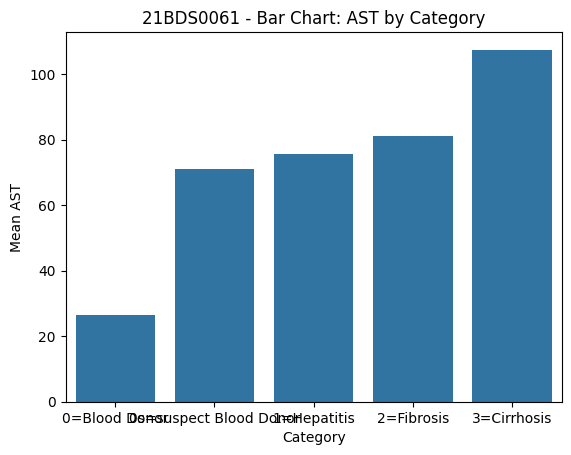

In [ ]:
sns.barplot(data=data, x="Category", y="AST", estimator=np.mean, ci=None)
plt.xlabel("Category")
plt.ylabel("Mean AST")
plt.title("21BDS0061 - Bar Chart: AST by Category")
plt.show()

#### **Density Plot**

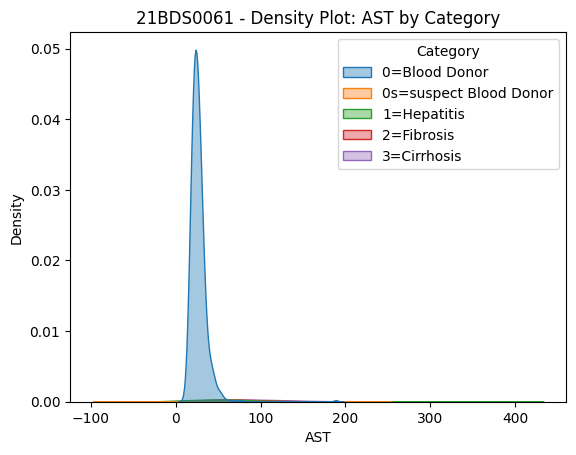

In [ ]:
sns.kdeplot(data=data, x="AST", hue="Category", fill=True, alpha=0.4)
plt.xlabel("AST")
plt.ylabel("Density")
plt.title("21BDS0061 - Density Plot: AST by Category")
plt.show()

#### **Box Plot**

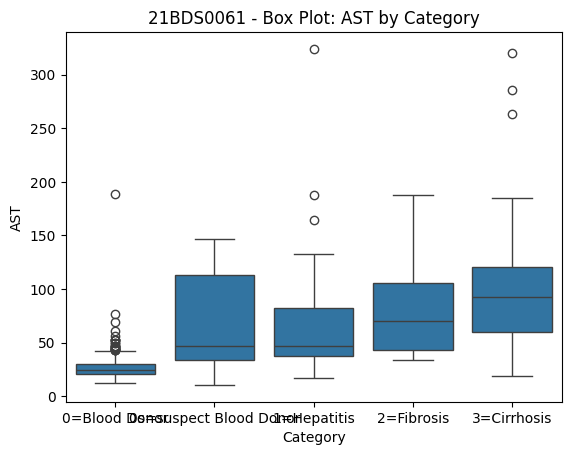

In [ ]:
sns.boxplot(data=data, x="Category", y="AST")
plt.xlabel("Category")
plt.ylabel("AST")
plt.title("21BDS0061 - Box Plot: AST by Category")
plt.show()


#### **Violin Plot**

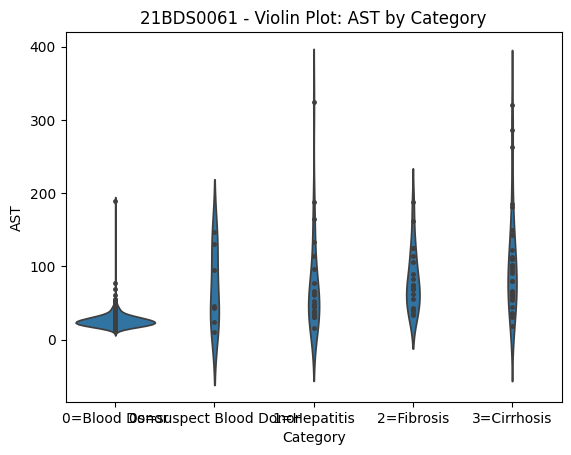

In [ ]:
sns.violinplot(data=data, x="Category", y="AST", inner="point")
plt.xlabel("Category")
plt.ylabel("AST")
plt.title("21BDS0061 - Violin Plot: AST by Category")
plt.show()

#### **Violin + Box Plot**

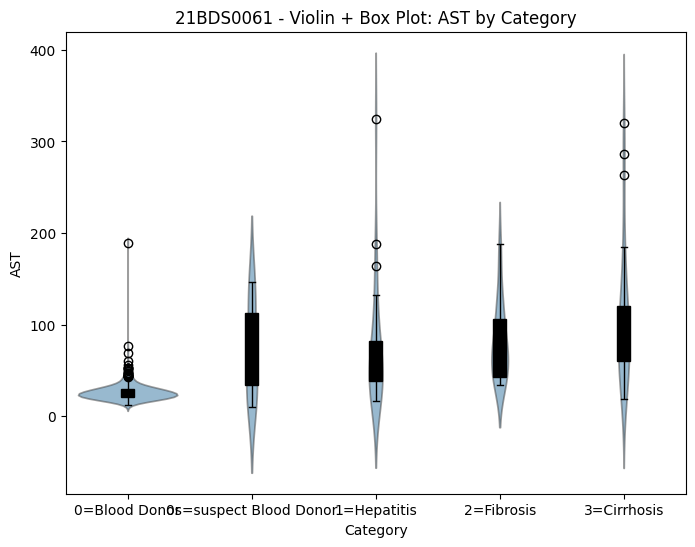

In [ ]:
plt.figure(figsize = (8, 6))
sns.violinplot(data = data, x = "Category", y = "AST", inner = None, alpha = 0.5)
sns.boxplot(data = data, x = "Category", y = "AST", width = 0.1, color = "black")
plt.xlabel("Category")
plt.ylabel("AST")
plt.title("21BDS0061 - Violin + Box Plot: AST by Category")
plt.show()

### **Multivariate Analysis**

#### **Scatter Plot**

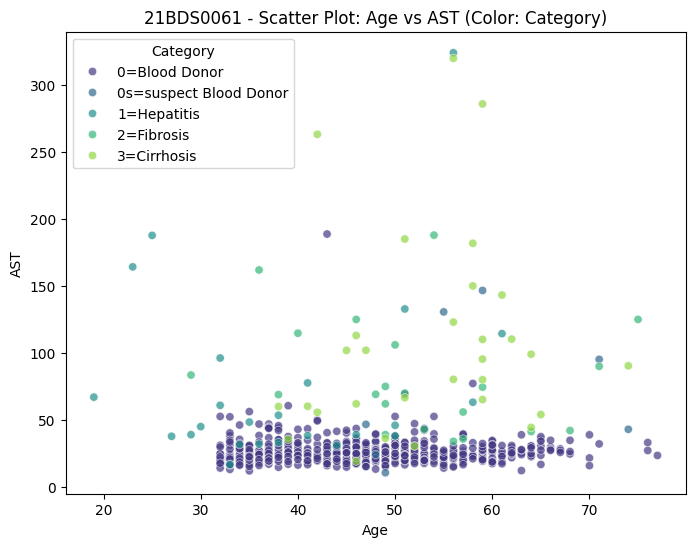

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Age", y="AST", hue="Category", palette="viridis", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Scatter Plot: Age vs AST (Color: Category)")
plt.legend(title="Category")
plt.show()

#### **Bubble Plot**

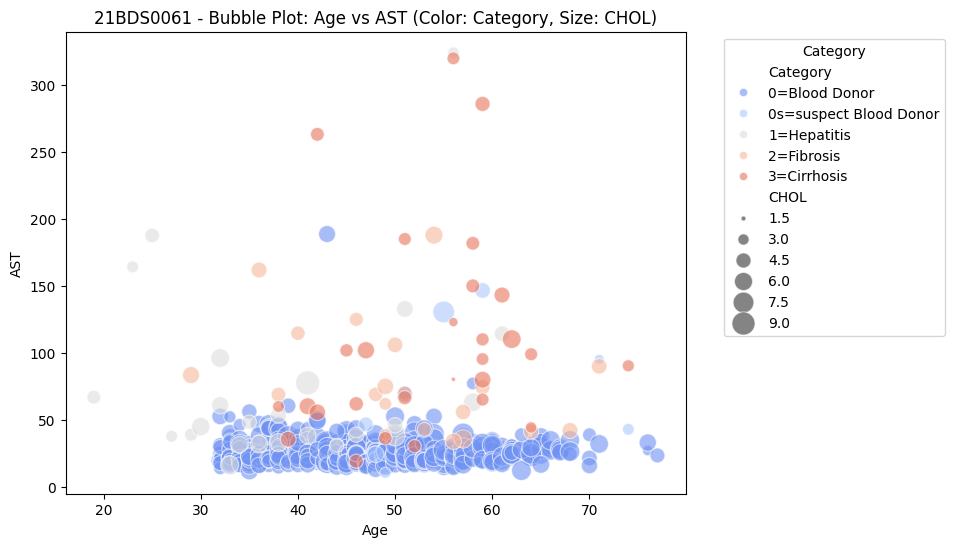

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Age", y="AST", hue="Category", size="CHOL", sizes=(10, 300), alpha=0.6, palette="coolwarm")
plt.xlabel("Age")
plt.ylabel("AST")
plt.title("21BDS0061 - Bubble Plot: Age vs AST (Color: Category, Size: CHOL)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


#### **Sub-Graph**

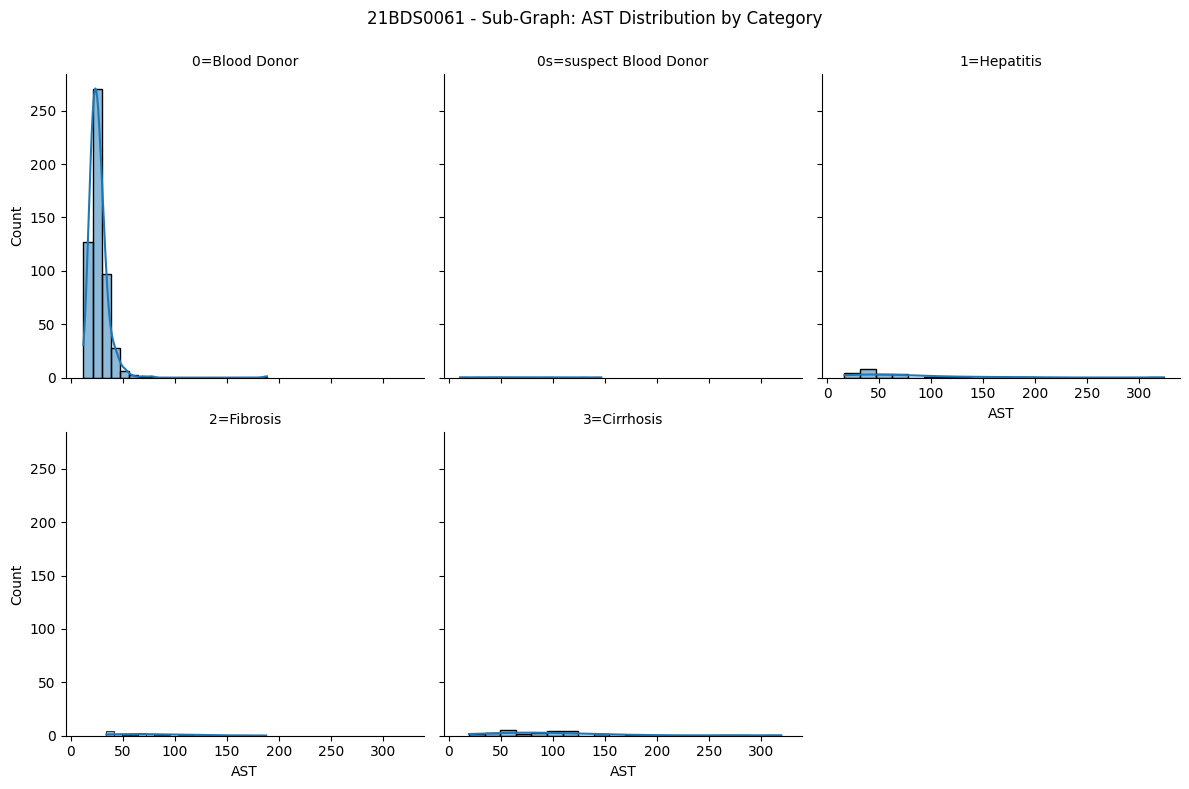

In [ ]:
g = sns.FacetGrid(data, col="Category", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="AST", kde=True, bins=20)
g.set_titles("{col_name}")
g.set_axis_labels("AST", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("21BDS0061 - Sub-Graph: AST Distribution by Category")
plt.show()